# Фильтр Баттерворта

In [2]:
import pandas as pd
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt
from scipy import signal
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
n = np.load('train/00009_hr.npy').transpose().reshape((60000,))

In [6]:
iSampleRate = 2000 #Частота дискретизации
t = np.linspace(0, len(n) / iSampleRate, len(n))
xFFT = np.abs(np.fft.rfft(n)/ len(n))  # быстрое преобразование Фурье
xFreqs = np.linspace(0, iSampleRate/2, int(len(n)/2)+1)

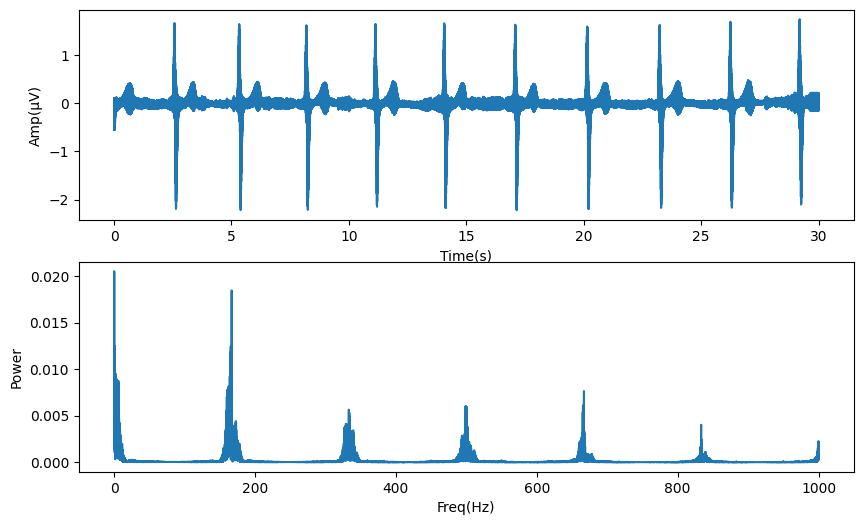

In [7]:
plt.figure(figsize=(10,6))
ax0 = plt.subplot(211)             # сигнал временной области
ax0.set_xlabel("Time(s)")
ax0.set_ylabel("Amp(μV)")
ax0.plot(t, n)

ax1 = plt.subplot(212)             #   сигнал-спектр в частотной области
ax1.set_xlabel("Freq(Hz)")
ax1.set_ylabel("Power")
ax1.plot(xFreqs, xFFT)
plt.show()

In [8]:
def butterBandPassFilter(lowcut, highcut, samplerate, order):
    #Создание полосового фильтра Баттерворта
    semiSampleRate = samplerate*0.5
    low = lowcut / semiSampleRate
    high = highcut / semiSampleRate
    b,a = signal.butter(order,[low,high],btype='bandpass')
    print("bandpass:","b.shape:",b.shape,"a.shape:",a.shape,"order=",order)
    print("b=",b)
    print("a=",a)
    return b,a

def butterBandStopFilter(lowcut, highcut, samplerate, order):
    #Создание полосового стоп-фильтра Баттерворта
    semiSampleRate = samplerate*0.5
    low = lowcut / semiSampleRate
    high = highcut / semiSampleRate
    b,a = signal.butter(order,[low,high],btype='bandstop')
    print("bandstop:","b.shape:",b.shape,"a.shape:",a.shape,"order=",order)
    print("b=",b)
    print("a=",a)
    return b,a

In [14]:
for k in [2, 3, 4]:
    b, a = butterBandPassFilter(3,70,samplerate=iSampleRate,order=k)
    w, h = signal.freqz(b, a, worN=2000)

for k in [2, 3, 4]:
    b, a = butterBandStopFilter(48, 52, samplerate=iSampleRate, order=k)
    w, h = signal.freqz(b, a, worN=2000)

bandpass: b.shape: (5,) a.shape: (5,) order= 2
b= [ 0.00961483  0.         -0.01922967  0.          0.00961483]
a= [ 1.         -3.70024346  5.14358108 -3.18588885  0.74255496]
bandpass: b.shape: (7,) a.shape: (7,) order= 3
b= [ 0.0009546   0.         -0.00286381  0.          0.00286381  0.
 -0.0009546 ]
a= [  1.          -5.57397516  12.96101444 -16.09492108  11.25859282
  -4.20660284   0.65589184]
bandpass: b.shape: (9,) a.shape: (9,) order= 4
b= [ 9.45175658e-05  0.00000000e+00 -3.78070263e-04  0.00000000e+00
  5.67105395e-04  0.00000000e+00 -3.78070263e-04  0.00000000e+00
  9.45175658e-05]
a= [  1.          -7.44270752  24.25585504 -45.21282662  52.72319645
 -39.38681131  18.40855424  -4.92150487   0.57624459]
bandstop: b.shape: (5,) a.shape: (5,) order= 2
b= [ 0.9911536  -3.91588069  5.85005324 -3.91588069  0.9911536 ]
a= [ 1.         -3.93327872  5.84997498 -3.89848267  0.98238545]
bandstop: b.shape: (7,) a.shape: (7,) order= 3
b= [  0.98751217  -5.85224109  14.5231453  -19.31681

In [11]:
# Выполнить полосовую фильтрацию
b,a = butterBandPassFilter(10, 50,iSampleRate,order=4)
b = signal.lfilter(b,a,n)

# Выполнить полосу прекратить фильтрацию
b,a = butterBandStopFilter(48,52,iSampleRate,order=2)
n = signal.lfilter(b,a,n)

bandpass: b.shape: (9,) a.shape: (9,) order= 4
b= [ 1.32937289e-05  0.00000000e+00 -5.31749156e-05  0.00000000e+00
  7.97623734e-05  0.00000000e+00 -5.31749156e-05  0.00000000e+00
  1.32937289e-05]
a= [  1.          -7.6527827   25.64597452 -49.15718723  58.94461344
 -45.27863033  21.75890323  -5.98080126   0.71991033]
bandstop: b.shape: (5,) a.shape: (5,) order= 2
b= [ 0.9911536  -3.91588069  5.85005324 -3.91588069  0.9911536 ]
a= [ 1.         -3.93327872  5.84997498 -3.89848267  0.98238545]


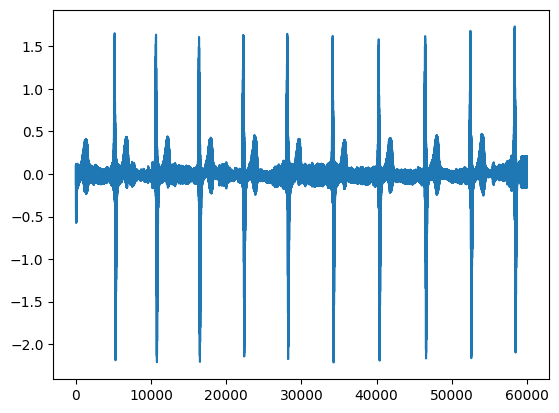

In [12]:
plt.plot(n)